# Exploratory Data Analysis
To further process our data, we trysummarize their main characteristics using visual methods

In [1]:
# import all depedencies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import calendar
import os

In [2]:
# read data
df_raw = pd.read_csv('data/hotel_bookings.csv')

In [3]:
# find non-canceled booking in city hotel
df = df_raw[(df_raw['is_canceled'] == 0) & (df_raw['hotel'] == 'City Hotel')]

In [4]:
# enumerate month
name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: name_to_num[x])

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# all variables available
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46228 entries, 40060 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           46228 non-null  object 
 1   is_canceled                     46228 non-null  int64  
 2   lead_time                       46228 non-null  int64  
 3   arrival_date_year               46228 non-null  int64  
 4   arrival_date_month              46228 non-null  int64  
 5   arrival_date_week_number        46228 non-null  int64  
 6   arrival_date_day_of_month       46228 non-null  int64  
 7   stays_in_weekend_nights         46228 non-null  int64  
 8   stays_in_week_nights            46228 non-null  int64  
 9   adults                          46228 non-null  int64  
 10  children                        46228 non-null  float64
 11  babies                          46228 non-null  int64  
 12  meal                       

In [6]:
# preview of data
df.head(n=10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,7,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,7,27,2,0,3,1,...,No Deposit,1.0,NaN,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40073,City Hotel,0,4,2015,7,27,3,0,2,1,...,No Deposit,1.0,NaN,0,Transient-Party,63.00,0,0,Check-Out,2015-07-05
40075,City Hotel,0,43,2015,7,27,3,0,2,1,...,No Deposit,1.0,NaN,0,Transient-Party,63.00,0,0,Check-Out,2015-07-05
40077,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40078,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40082,City Hotel,0,43,2015,7,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05


In [7]:
#descriptive statistics for numeric columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,46228.0,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,...,46228.000000,46228.000000,46228.000000,46228.000000,40706.000000,2905.000000,46228.000000,46228.000000,46228.000000,46228.000000
mean,0.0,80.702734,2016.176062,6.546054,27.159535,15.818616,0.800684,2.122934,1.828113,0.099896,...,0.034416,0.021156,0.208510,0.264364,28.081511,143.195869,2.150082,105.745948,0.041814,0.741088
std,0.0,89.863028,0.690836,3.073564,13.562081,8.729889,0.861508,1.400799,0.536068,0.386141,...,0.182298,0.336915,2.123928,0.709713,56.321663,119.933759,17.576460,40.596109,0.201137,0.833852
min,0.0,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,12.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,80.000000,0.000000,0.000000
50%,0.0,50.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,91.000000,0.000000,99.900000,0.000000,1.000000
75%,0.0,121.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,219.000000,0.000000,126.000000,0.000000,1.000000
max,0.0,518.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,...,1.000000,13.000000,72.000000,21.000000,509.000000,497.000000,379.000000,510.000000,3.000000,5.000000


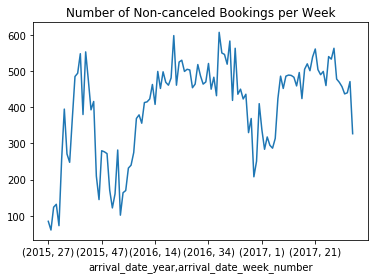

In [8]:
#plot time series
series = df.groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.show()

As seen above, there is a seasonal trend in the weekly number of bookings. We will then dive into detail about this trend.

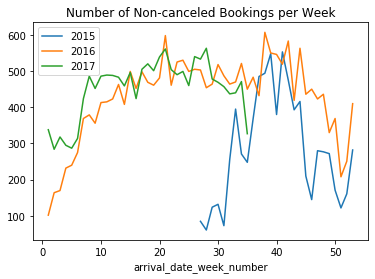

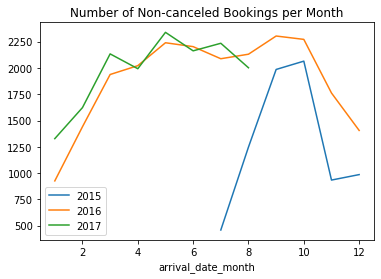

In [9]:
#weekly and monthly time series

series15_week = df[df['arrival_date_year'] == 2015].groupby(['arrival_date_week_number'])['hotel'].count()
series16_week = df[df['arrival_date_year'] == 2016].groupby(['arrival_date_week_number'])['hotel'].count()
series17_week = df[df['arrival_date_year'] == 2017].groupby(['arrival_date_week_number'])['hotel'].count()

series15_week.plot()
series16_week.plot()
series17_week.plot()

plt.legend(['2015','2016','2017'])
plt.title('Number of Non-canceled Bookings per Week')
plt.show()

series15_month = df[df['arrival_date_year'] == 2015].groupby(['arrival_date_month'])['hotel'].count()
series16_month = df[df['arrival_date_year'] == 2016].groupby(['arrival_date_month'])['hotel'].count()
series17_month = df[df['arrival_date_year'] == 2017].groupby(['arrival_date_month'])['hotel'].count()

series15_month.plot()
series16_month.plot()
series17_month.plot()

plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['2015','2016','2017'])
plt.show()

In general, the number or visitors is highest in the middle of the year.

We will now look for trends occuring in a shorter period.

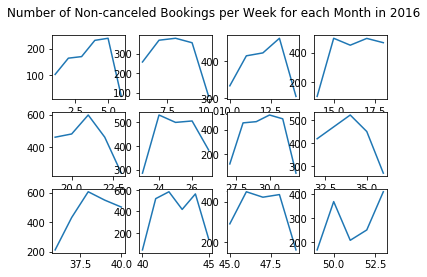

In [10]:
#weekly time series each month

fig, axs = plt.subplots(3, 4)
fig.suptitle('Number of Non-canceled Bookings per Week for each Month in 2016')

for i in range(1,5):
    series16_i_week = df[(df['arrival_date_year'] == 2016) & (df['arrival_date_month'] == i) ].groupby(['arrival_date_week_number'])['hotel'].count()
    axs[0,i-1].plot(series16_i_week)

for i in range(5,9):
    series16_i_week = df[(df['arrival_date_year'] == 2016) & (df['arrival_date_month'] == i) ].groupby(['arrival_date_week_number'])['hotel'].count()
    axs[1,i-5].plot(series16_i_week)
    
for i in range(9,13):
    series16_i_week = df[(df['arrival_date_year'] == 2016) & (df['arrival_date_month'] == i) ].groupby(['arrival_date_week_number'])['hotel'].count()
    axs[2,i-9].plot(series16_i_week)

plt.show()

In general, the number of visitors is highest in the middle of the month.

Now we will look at several variables that may affect the number of visitors
1. Lead Time
2. Customer Type
3. Country

# 1. Lead Time

50.0

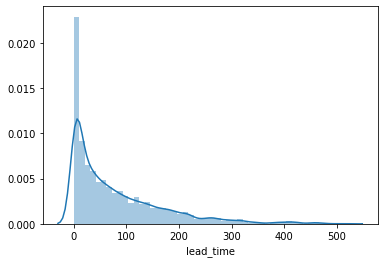

In [11]:
# distribution of lead_time
sns.distplot(df['lead_time'])
df['lead_time'].median()

It appears that half of the customers book their hotel at least 50 days before their arrival, but there are also customers that book their hotel from more than a year before.

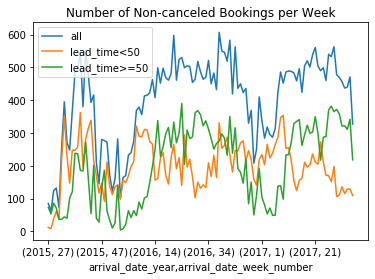

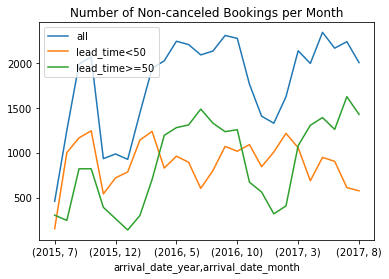

In [12]:
# plotting the effects of lead_time

plt.figure(1)
series_leadtime1_week = df[df['lead_time']<50].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series_leadtime2_week = df[df['lead_time']>=50].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
series_leadtime1_week.plot()
series_leadtime2_week.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.legend(['all', 'lead_time<50','lead_time>=50'])
plt.show()
plt.figure(2)
series_leadtime1_month = df[df['lead_time']<50].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_leadtime2_month = df[df['lead_time']>=50].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month = df.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month.plot()
series_leadtime1_month.plot()
series_leadtime2_month.plot()
plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['all', 'lead_time<50','lead_time>=50'])
plt.show()

Apperently many customers book their hotel early (more than 50 days before) during summertime. This makes sense because families summer trips are generally planned pretty far ahead, and accomodation is a part of it.

# 2. Customer Type

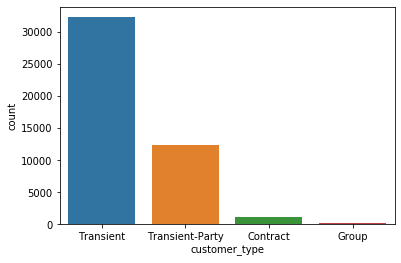

In [13]:
# bar plot for customer type
sns.countplot(df['customer_type'])

It appears that most of the costumers are transient, meaning that they are guests who are predominantly on-the-move and seek short (and often urgent!) hotel-stays.

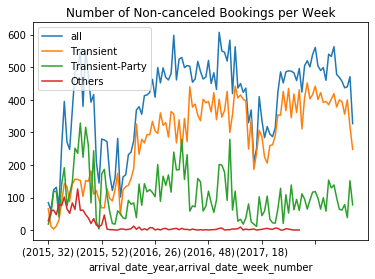

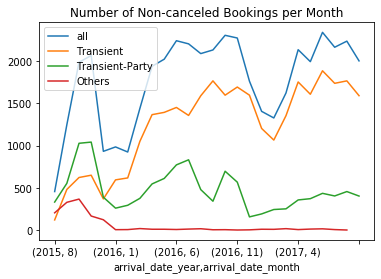

In [14]:
# plotting the effects of customer_type

plt.figure(1)
series_customer1_week = df[df['customer_type']=='Transient'].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series_customer2_week = df[df['customer_type']=='Transient-Party'].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series_customer3_week = df[df['customer_type'].isin(['Contract','Group'])].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
series_customer1_week.plot()
series_customer2_week.plot()
series_customer3_week.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.legend(['all', 'Transient','Transient-Party','Others'])
plt.show()
plt.figure(2)
series_customer1_month = df[df['customer_type']=='Transient'].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_customer2_month = df[df['customer_type']=='Transient-Party'].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_customer3_month = df[df['customer_type'].isin(['Contract','Group'])].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month.plot()
series_customer1_month.plot()
series_customer2_month.plot()
series_customer3_month.plot()
plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['all', 'Transient','Transient-Party','Others'])
plt.show()

Throughout 2016-2017, bookings are always dominated by transient guests. However this trend is different in 2015, where there are more Transient-Parties. This might be a bias caused by the data collection system in the beginning.

# 3. Country

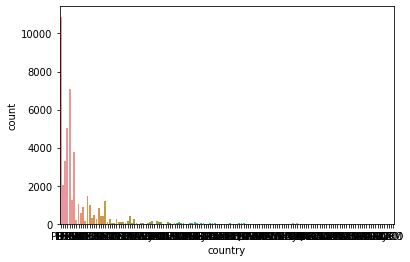

In [15]:
# bar plot for country
sns.countplot(df['country'])

Since there are so many countries listed we will only look at some countries that orders the most booking.

In [16]:
pd.DataFrame(df.groupby('country').count()['hotel']).sort_values('hotel', ascending=False).head(n=20)

,hotel
country,
PRT,10879
FRA,7081
DEU,5012
GBR,3753
ESP,3285
ITA,2054
BEL,1479
NLD,1259
USA,1189


The primary customers are from Portugal, France, Germany, UK, Spain, and Italy. To further visualize our data, we will consider this countries as 'primary countries'.

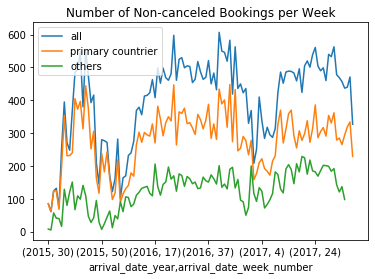

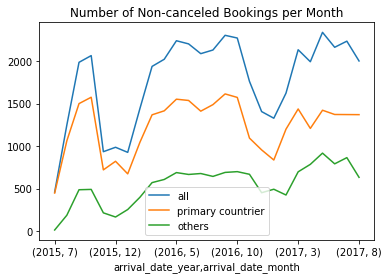

In [17]:
# plotting the effects of country

plt.figure(1)
series_country1_week = df[df['country'].isin(['PRT','FRA','DEU','GBR','ESP','ITA'])].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series_country2_week = df[~df['country'].isin(['PRT','FRA','DEU','GBR','ESP','ITA'])].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
series_country1_week.plot()
series_country2_week.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.legend(['all', 'primary countrier','others'])
plt.show()
plt.figure(2)
series_country1_month = df[df['country'].isin(['PRT','FRA','DEU','GBR','ESP','ITA'])].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_country2_month = df[~df['country'].isin(['PRT','FRA','DEU','GBR','ESP','ITA'])].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month = df.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month.plot()
series_country1_month.plot()
series_country2_month.plot()
plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['all', 'primary countrier','others'])
plt.show()

It can be deduced that the distribution of customers' country is independent of time, as the trends remain the same, thus it may not be relevant as a feature.